<a href="https://colab.research.google.com/github/nilabja10201992/Cryptocurrency-Price-Prediction/blob/ajay_branch/using_close_and_volume_attribute_timestep60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 21.0MB/s 


In [0]:
link = 'https://drive.google.com/open?id=13WpQRYkUI61b2YjraEOddCS_N3Bcb5Rh'

In [3]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

13WpQRYkUI61b2YjraEOddCS_N3Bcb5Rh


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv')  
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2019-03-13.csv')

In [7]:
print(list(df.columns), "\nSHAPE ::", df.shape)
for i in df.columns:
    print(i, "::", df[i].dtype)

# Declaring number for random state for reproducibility
rstate=123
    
df.describe()

['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price'] 
SHAPE :: (3778817, 8)
Timestamp :: int64
Open :: float64
High :: float64
Low :: float64
Close :: float64
Volume_(BTC) :: float64
Volume_(Currency) :: float64
Weighted_Price :: float64


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3.778817e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06,2.551132e+06
mean,1.438908e+09,2.654668e+03,2.656783e+03,2.652286e+03,2.654650e+03,1.068140e+01,2.395856e+04,2.654510e+03
std,6.561491e+07,3.529553e+03,3.533184e+03,3.525347e+03,3.529522e+03,3.476243e+01,8.829950e+04,3.529271e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.382000e+09,3.489800e+02,3.491500e+02,3.487800e+02,3.489900e+02,4.500000e-01,2.480382e+02,3.489681e+02
50%,1.439071e+09,6.595600e+02,6.600000e+02,6.589900e+02,6.596200e+02,2.095163e+00,1.814312e+03,6.595521e+02
75%,1.495753e+09,4.045492e+03,4.049115e+03,4.042050e+03,4.045400e+03,8.284949e+00,1.303504e+04,4.045115e+03
max,1.552435e+09,1.966576e+04,1.966600e+04,1.964996e+04,1.966575e+04,5.853852e+03,5.483271e+06,1.966330e+04


In [14]:
a = df[["Close","Volume_(BTC)"]][1200000:].fillna(method="backfill")
a.head()

,Close,Volume_(BTC)
1200000,423.68,4.000000
1200001,423.67,0.950200
1200002,423.55,1.517910
1200003,423.55,1.000000
1200004,423.49,1.039435


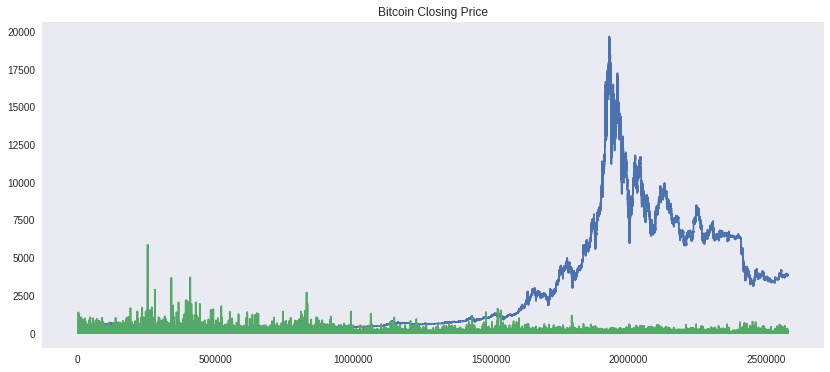

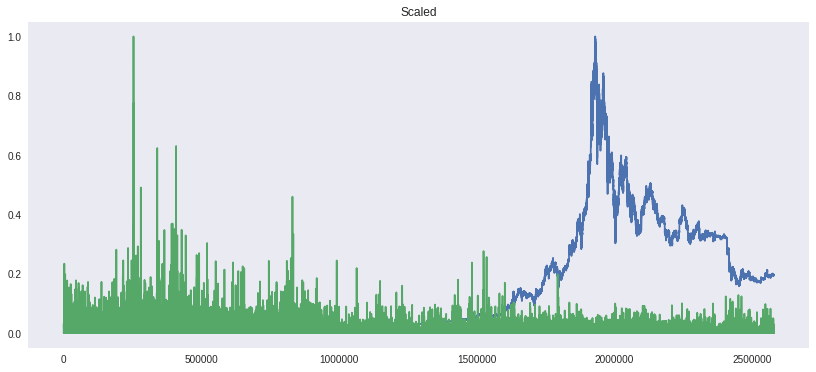

In [17]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
close_price = np.array(a).reshape(-1,2)
plt.figure(figsize=(14,6))
plt.title("Bitcoin Closing Price")
plt.grid()
plt.plot(close_price)

sc = MinMaxScaler()
close_priceSC = sc.fit_transform(close_price)
plt.figure(figsize=(14,6))
plt.title("Scaled")
plt.grid()
plt.plot(close_priceSC)

In [18]:
X = []
y = []
for i in range(60, len(close_priceSC)):
    X.append(close_priceSC[i-60:i, 0:2])
    y.append(close_priceSC[i,0])
X, y = np.array(X), np.array(y)
print(X.shape, y.shape)


(2578757, 60, 2) (2578757,)


In [19]:
print(X.shape)
print(y.shape)

(2578757, 60, 2)
(2578757,)


In [20]:
X_train = X[:2500000,:]
X_test = X[2500000:,:]

y_train = y[:2500000]
y_test = y[2500000:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2500000, 60, 2)
(78757, 60, 2)
(2500000,)
(78757,)


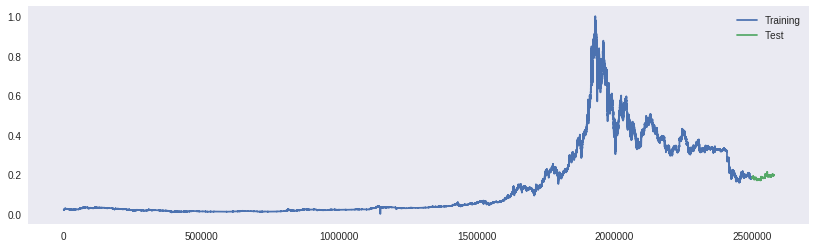

In [21]:
plt.figure(figsize=(14,4))
plt.plot(range(2500000),y_train)
plt.plot(range(2500000, len(y)), y_test)
plt.legend(["Training", "Test"])
plt.grid()

In [0]:
X_train = X_train.reshape(-1,60,2)
X_test = X_test.reshape(-1,60,2)

In [24]:
import os
import warnings
warnings.filterwarnings(action='ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Library for Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

Using TensorFlow backend.


In [25]:
%%time
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],2)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.5))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.5))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_absolute_error')
# Fitting to the training set
regressor.fit(X_train, y_train, epochs=1, batch_size=500)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/1
2500000/2500000 [==============================] - 4543s 2ms/step - loss: 0.0147
CPU times: user 1h 8min 45s, sys: 5min 47s, total: 1h 14min 32s
Wall time: 1h 15min 47s


In [26]:
%%time
y_pred = regressor.predict(X_test)
print(y_pred.shape)
print(y_test.shape)

(78757, 1)
(78757,)
CPU times: user 11min 31s, sys: 57.9 s, total: 12min 29s
Wall time: 12min 51s


In [0]:
y_pred=np.squeeze(y_pred)

In [28]:
y_pred.shape

(78757,)

In [0]:
def systematic_mean_absolute_percentage_error(y_true, y_pred):
    n = y_true.shape[0]
    res = 0
    for i in range(n):
        num = np.abs(y_pred[i] - y_true[i])
        dem = (np.abs(y_true[i]) + np.abs(y_pred[i]))/2
        res += num/dem
    res = np.squeeze(res)
    return 100*(res/n)

In [0]:
def mean_absolute_scaled_error(y_true, y_pred):
    n = y_true.shape[0]
    res = 0
    dem = 0
    num = 0
    for i in range(n-1):
        dem += y_true[i+1] - y_true[i]
    for i in range(n):
        num = abs(y_pred[i] - y_true[i])
        num = np.squeeze(num)
        res += num/dem
    res = np.squeeze(res)
    #print(num, dem, res)
    return res/n

In [31]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

0.007618099866309297

In [32]:
zero_arr=np.zeros(len(y_test))
zero_arr.shape

(78757,)

In [33]:
y_pred1=np.column_stack((y_pred,zero_arr))
y_test1=np.column_stack((y_test,zero_arr))
print(y_pred1.shape)
print(y_test1.shape)


(78757, 2)
(78757, 2)


In [0]:
y_pred_rescaled=sc.inverse_transform(y_pred1.reshape(-1,2))
y_test_rescaled=sc.inverse_transform(y_test1.reshape(-1,2))

In [0]:
y_pred_rescaled=np.delete(y_pred_rescaled,1,1)
y_test_rescaled=np.delete(y_test_rescaled,1,1)

Text(0, 0.5, 'Price')

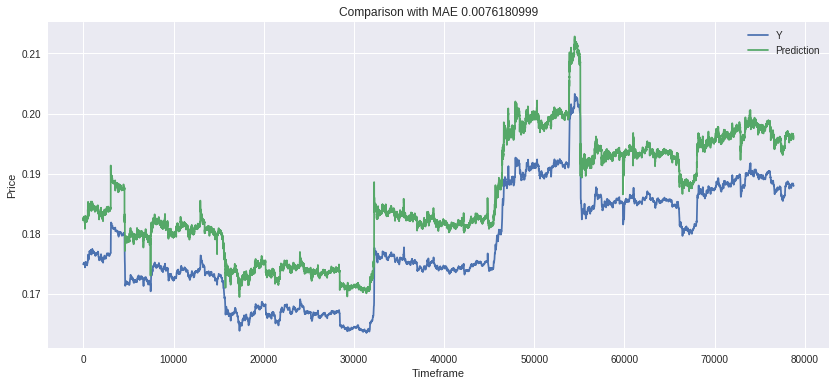

In [36]:
plt.figure(figsize=(14,6))
plt.plot(y_pred)
plt.plot(y_test)
plt.title("Comparison with MAE {0:0.10f}".format(MAE))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")

In [37]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_pred)
MSE

5.834277448128909e-05

In [38]:
SMAPE = systematic_mean_absolute_percentage_error(y_test, y_pred)
SMAPE

4.17962246849346

Text(0, 0.5, 'Price')

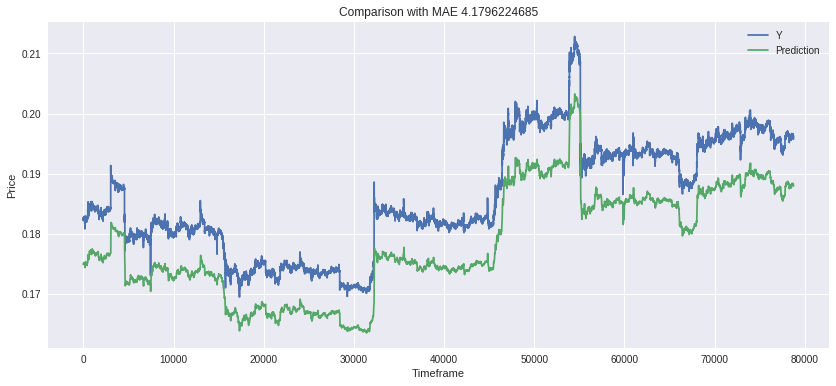

In [39]:
plt.figure(figsize=(14,6))
plt.plot(y_test)
plt.plot(y_pred)
plt.title("Comparison with MAE {0:0.10f}".format(SMAPE))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")

In [40]:
MASE = mean_absolute_scaled_error(y_test, y_pred)
MASE

0.5449606034998387

Text(0, 0.5, 'Price')

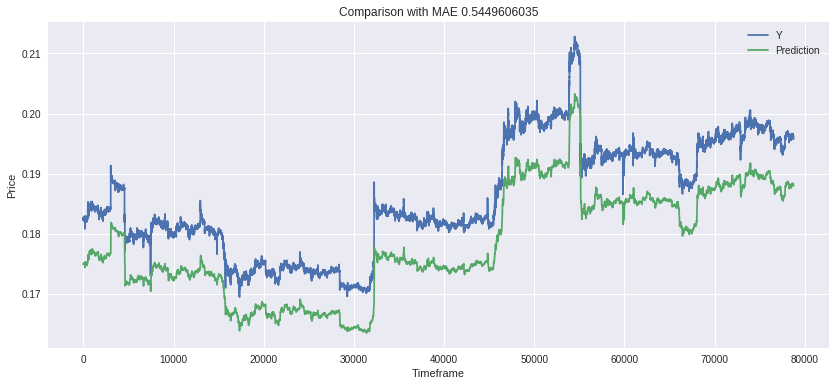

In [41]:
plt.figure(figsize=(14,6))
plt.plot(y_test)
plt.plot(y_pred)
plt.title("Comparison with MAE {0:0.10f}".format(MASE))
plt.legend(["Y", "Prediction"])
plt.xlabel("Timeframe")
plt.ylabel("Price")